<a href="https://colab.research.google.com/github/OwaisK4/QCNN/blob/main/QCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow

In [ ]:
!pip install qiskit-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.4/643.4 kB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.28.240-py3-none-any.whl size=682833 sha256=a7622870abb3aa7

In [ ]:
!pip install opencv-python

In [ ]:
!pip install qiskit
!pip install qiskit-machine-learning
!pip install pylatexenc
!pip install matplotlib pillow
!pip install qiskit-algorithms
!pip install qiskit[visualization]
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 14.9 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512547 sha256=26a9dacb3cd630819fa0ad781a38e469dfce4568099debabc0665cd38972e85c
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=5e42229f34e793ea9f161c7b8153752b970f7ffed9212df5ffb5ced14741952b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


# Main Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import cv2

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Select only 2 digits
x_train_twoDigit = []
x_test_twoDigit = []
y_train_twoDigit = []
y_test_twoDigit = []

for i in range(0,len(x_train)):
  if y_train[i] == 0:
    x_train_twoDigit.append(x_train[i])
    y_train_twoDigit.append(1)
  if y_train[i] == 2:
    x_train_twoDigit.append(x_train[i])
    y_train_twoDigit.append(-1)

for i in range(0,len(x_test)):
  if y_test[i] == 0:
    x_test_twoDigit.append(x_test[i])
    y_test_twoDigit.append(1)
  if y_test[i] == 2:
    x_test_twoDigit.append(x_test[i])
    y_test_twoDigit.append(-1)

x_train_twoDigit = np.array(x_train_twoDigit)
x_test_twoDigit = np.array(x_test_twoDigit)
y_train_twoDigit = np.array(y_train_twoDigit)
y_test_twoDigit = np.array(y_test_twoDigit)

print(x_train_twoDigit.shape)
print(y_train_twoDigit.shape)
print(x_test_twoDigit.shape)
print(y_test_twoDigit.shape)

# Size after preprocessing
size = 4

# Preprocess the data
def preprocess_image(image, target_size=(size, size)):
    downsample = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
    return downsample.flatten()

x_train_processed = np.ones((len(x_train_twoDigit), size*size))
x_test_processed = np.ones((len(x_test_twoDigit), size*size))

for i in range(len(x_train_twoDigit)):
    x_train_processed[i] = (preprocess_image(x_train_twoDigit[i]))

for i in range(len(x_test_twoDigit)):
    x_test_processed[i] = (preprocess_image(x_test_twoDigit[i]))

print(x_train_processed.shape)
print(x_test_processed.shape)

# plt.figure(figsize=(5, 2))
# plt.subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(x_train_twoDigit[1], cmap="gray")
# plt.subplot(1, 2, 2)
# plt.title("Processed Data")
# plt.imshow(x_train_processed[1].reshape(size,size), cmap="gray")
# plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(11881, 28, 28)
(11881,)
(2012, 28, 28)
(2012,)
(11881, 16)
(2012, 16)


In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split

algorithm_globals.random_seed = 12345

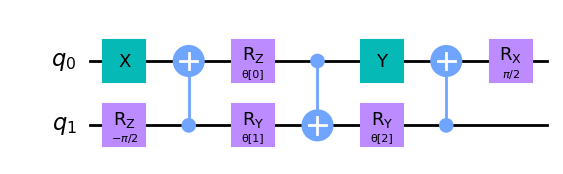

In [ ]:
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.x(0)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.y(0)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rx(np.pi / 2, 0)
    return target

params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl", style="clifford")

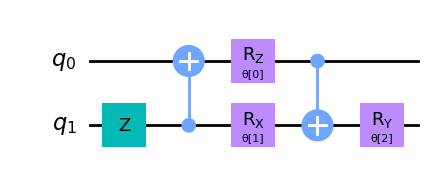

In [ ]:
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.z(1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.rx(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target


params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl", style="clifford")

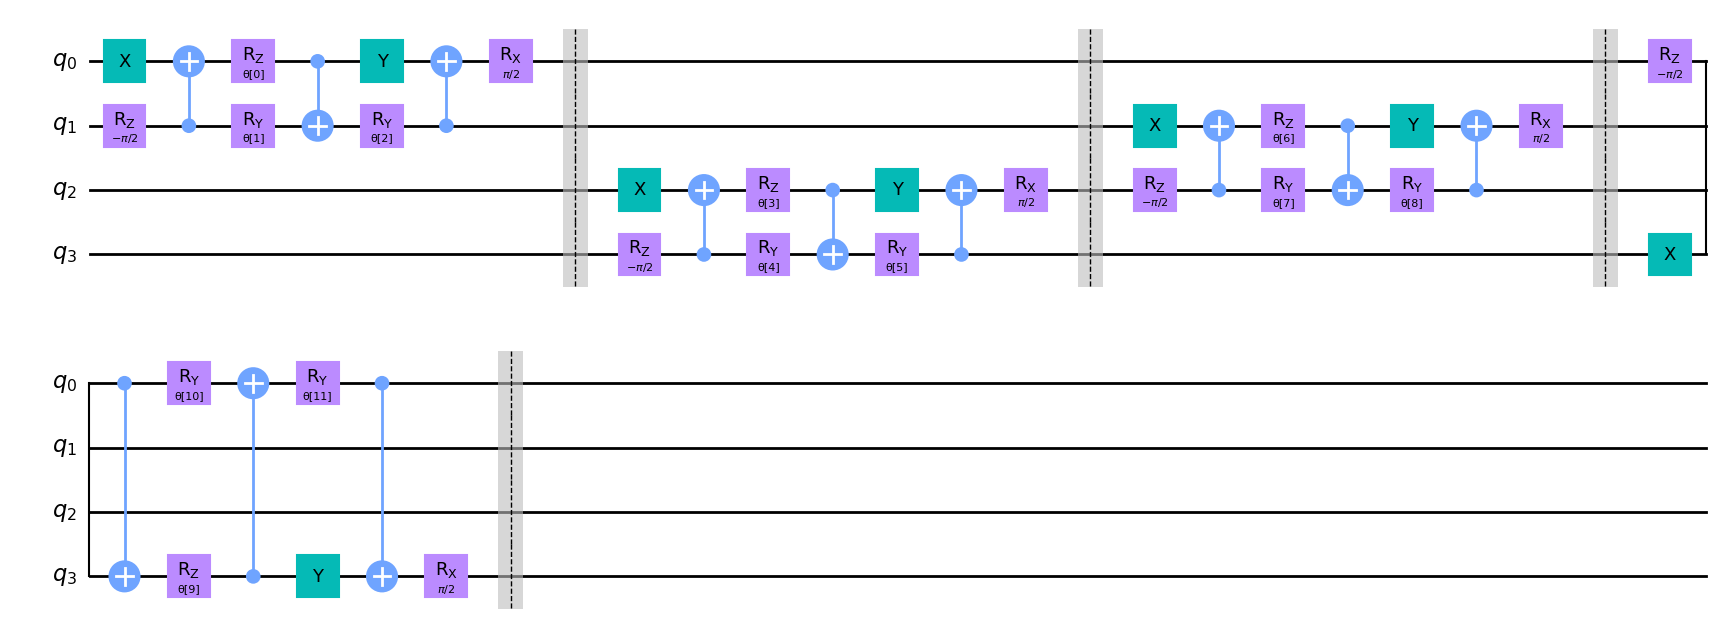

In [ ]:
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc


circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl", style="clifford")

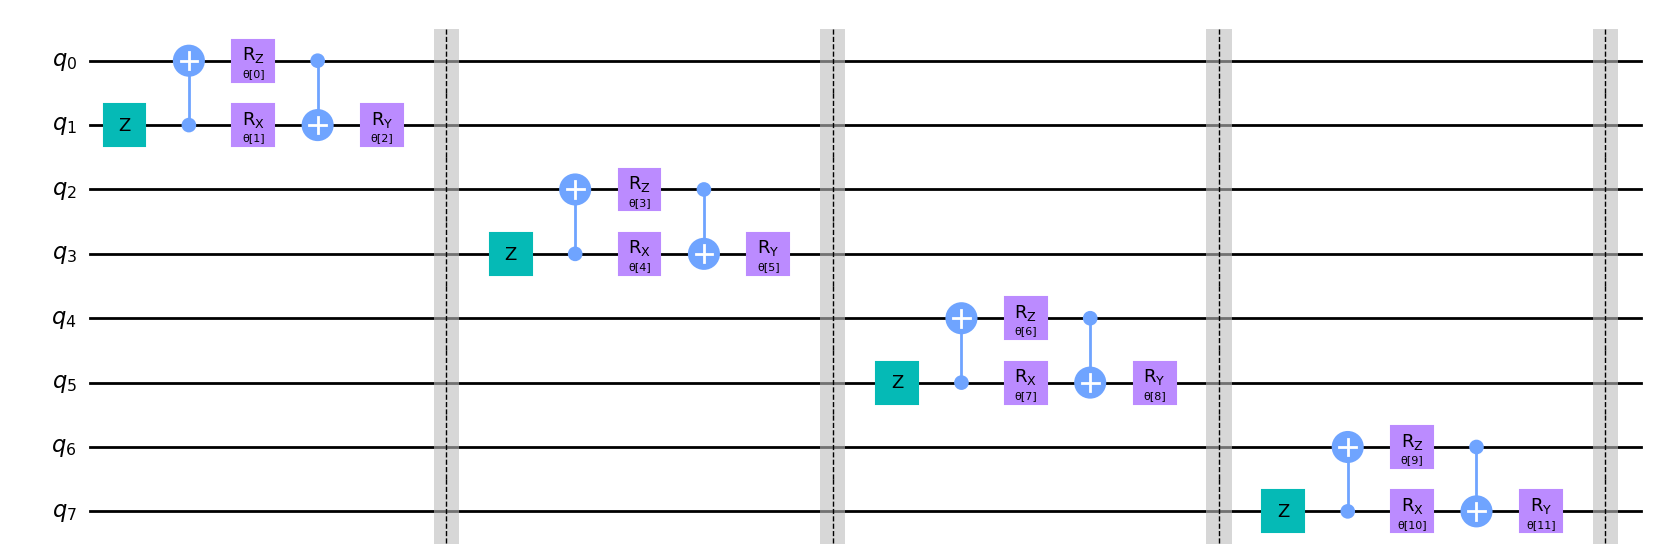

In [ ]:
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc


sources = [0, 2, 4, 6]
sinks = [1, 3, 5, 7]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl", style="clifford")

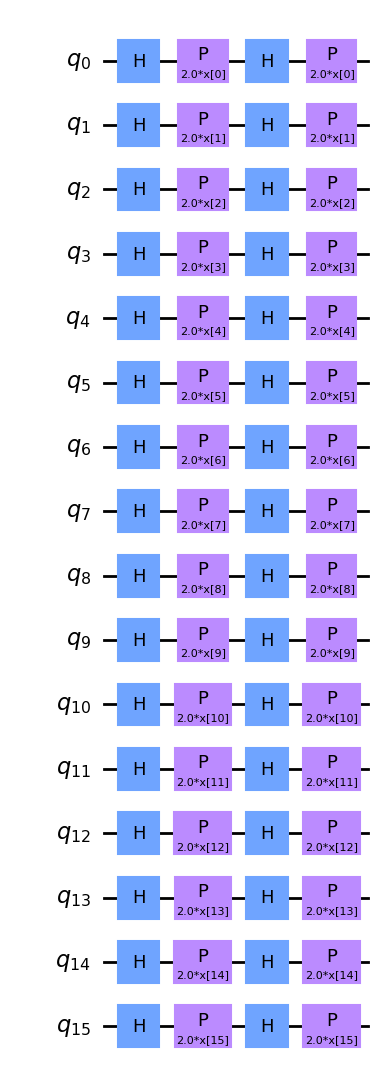

In [ ]:
feature_map = ZFeatureMap(16)
feature_map.decompose().draw("mpl", style="clifford")

In [ ]:
ansatz = QuantumCircuit(16, name="Ansatz")
# First Convolutional Layer
ansatz.compose(conv_layer(16, "c1"), list(range(0, 16)), inplace=True)
# First Pooling Layer
ansatz.compose(pool_layer([0, 2, 4, 6, 8, 10, 12, 14], [1, 3, 5, 7, 9, 11, 13, 15], "p1"), list(range(0, 16)), inplace=True)
# Second Convolutional Layer
ansatz.compose(conv_layer(8, "c2"), list(range(8,16)), inplace=True)
# Second Pooling Layer
ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p2"), list(range(8,16)), inplace=True)
# Third Convolutional Layer
ansatz.compose(conv_layer(4, "c3"), list(range(12, 16)), inplace=True)
# Third Pooling Layer
ansatz.compose(pool_layer([0, 1], [2, 3], "p3"), list(range(12, 16)), inplace=True)
# Fourth Convolutional Layer
ansatz.compose(conv_layer(2, "c4"), list(range(14, 16)), inplace=True)
# Fourth Pooling Layer
ansatz.compose(pool_layer([0], [1], "p4"), list(range(14, 16)), inplace=True)

# Combining the feature map and ansatz
circuit = QuantumCircuit(16)
circuit.compose(feature_map, range(16), inplace=True)
circuit.compose(ansatz, range(16), inplace=True)

observable = SparsePauliOp.from_list([("Z" + "I" * 15, 1)])

# we decompose the circuit for the QNN to avoid additional data copying
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)

<ipython-input-12-67d25e724903>:27: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(
<ipython-input-12-67d25e724903>:27: UserWarning: No number of qubits was not specified (None) and was retrieved from `circuit` (16). If `circuit` is transpiled, this may cause unstable behaviour.
  qnn = EstimatorQNN(


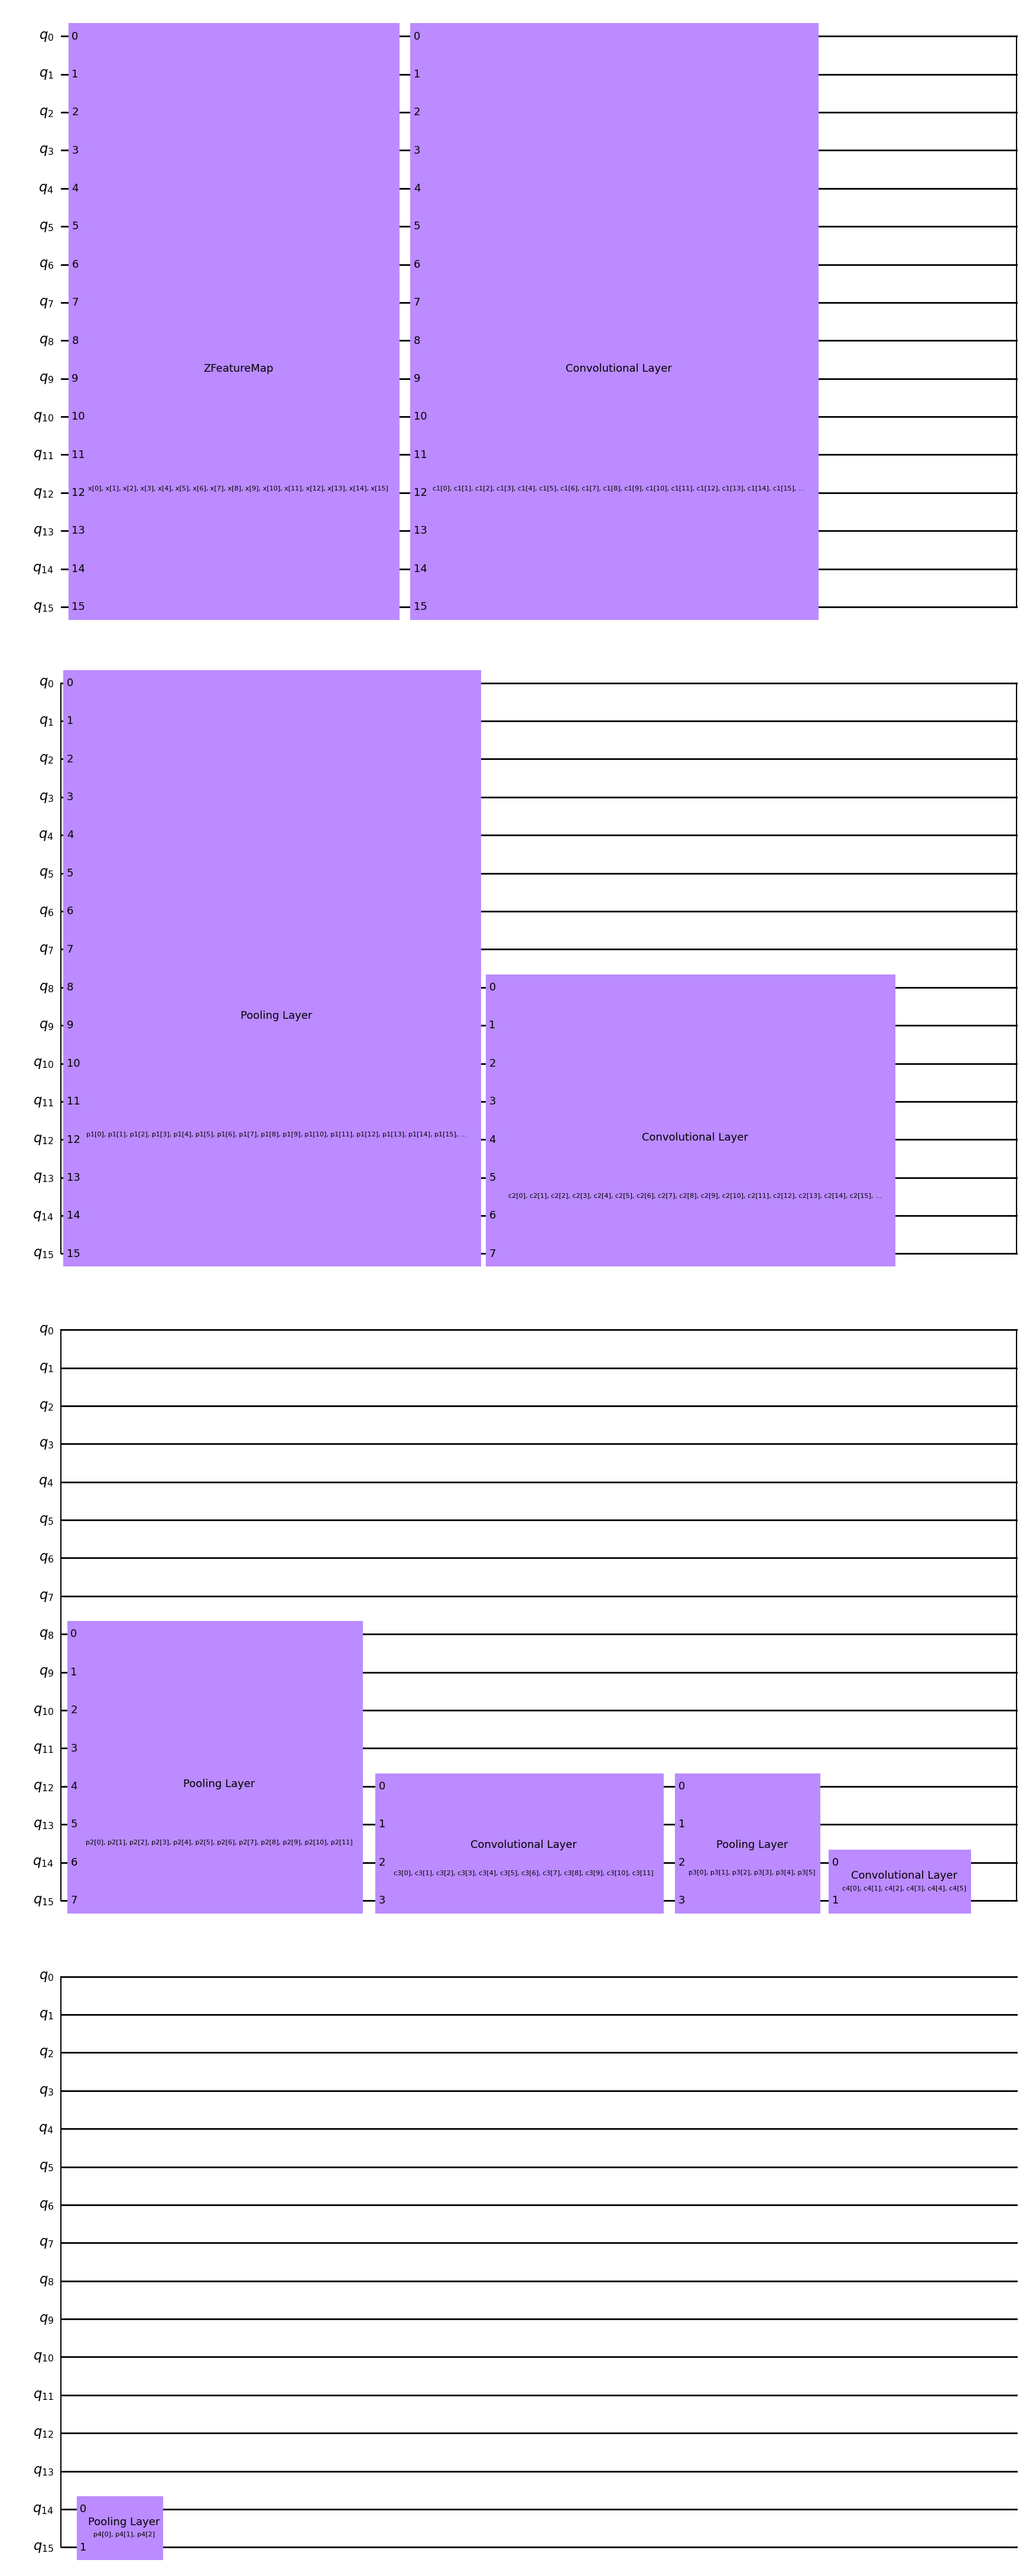

In [ ]:
circuit.draw("mpl", style="clifford")

In [ ]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=50),  # Set max iterations here
    callback=callback_graph,
)

In [ ]:
import random

random_numbers = random.sample(range(0, 11882), 1500)

x = []
y = []

for i in random_numbers:
    x.append(x_train_processed[i])
    y.append(y_train_twoDigit[i])

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)


(1500, 16)
(1500,)


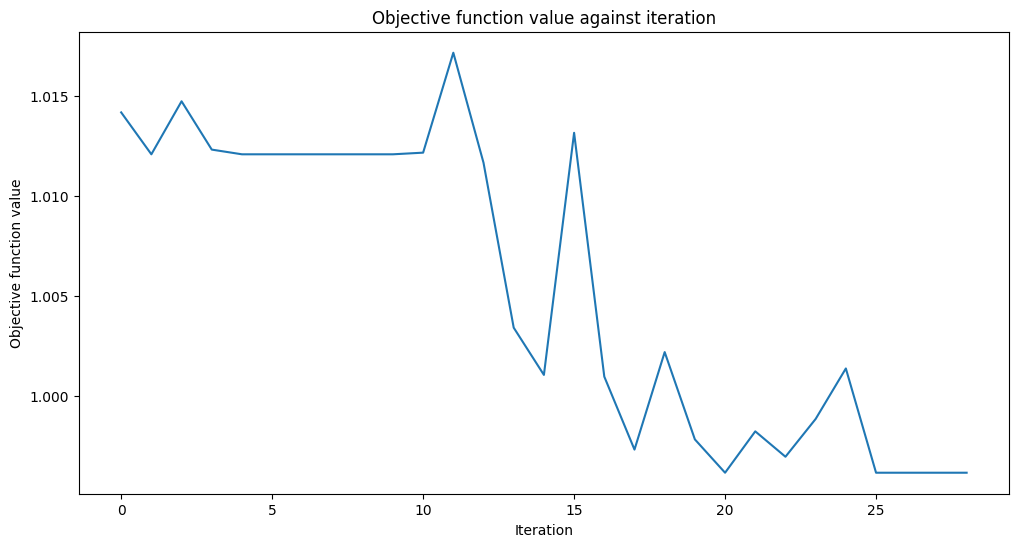

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-2e96f595c4a2>", line 6, in <cell line: 6>
    classifier.fit(x, y)
  File "/usr/local/lib/python3.10/dist-packages/qiskit_machine_learning/algorithms/trainable_model.py", line 199, in fit
    self._fit_result = self._fit_internal(X, y)
  File "/usr/local/lib/python3.10/dist-packages/qiskit_machine_learning/algorithms/classifiers/neural_network_classifier.py", line 116, in _fit_internal
    return self._minimize(function)
  File "/usr/local/lib/python3.10/dist-packages/qiskit_machine_learning/algorithms/trainable_model.py", line 295, in _minimize
    optimizer_result = self._optimizer.minimize(
  File "/usr/local/lib/python3.10/dist-packages/qiskit_machine_learning/optimizers/scipy_optimizer.py", line 148, in minimize
    raw_result = minimize(
  File "/usr/local/lib/py

TypeError: object of type 'NoneType' has no len()

In [ ]:
# x = np.asarray(x_train_processed)
# y = np.asarray(y_train_twoDigit)

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
classifier.fit(x, y)

# score classifier
print(f"Accuracy from the train data : {np.round(100 * classifier.score(x, y), 2)}%")

y_predict = classifier.predict(x_test_processed)
x = np.asarray(x_test_processed)
y = np.asarray(y_test_twoDigit)2
print(f"Accuracy from the test data : {np.round(100 * classifier.score(x, y), 2)}%")